In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import poisson,t
import pandas as pd
np.set_printoptions(precision=3)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
def gen_photon_count(N,T,plot=False):
    """Genera series de tiempo de conteo de N fotones por segundo y una ventana de tiempo de T(s)
    Regresa array de frequencia de conteo"""
    f=np.random.rand(N)
    freq,edges=np.histogram(f,bins=int(1/T))
    
    if plot==True:
        plt.figure(dpi=200)
        plt.plot(freq,'o')
        plt.xlabel('Ventana de tiempo')
        plt.ylabel('Conteo de fotones el el intervalo')
    
    return freq

In [4]:
def plot_pmf(freq,label=None):
    """Función para generar pmfs"""
    heights,bins=np.histogram(freq,bins=np.arange(0,freq.max()+1,1))
    heights = heights/sum(heights)
    plt.figure(dpi=200)
    plt.plot(bins[:-1],heights, '+',label=label)
    plt.xlabel('Num. Fotones n')
    plt.ylabel('P(n)')
    return bins[:-1]

In [5]:
def fano(mean,std):
    return std/np.sqrt(mean)

In [6]:
def ci(x):
    freq=x
    return np.array((freq.mean()-t.ppf(0.975,df=freq.shape[0]-1)*freq.std()/np.sqrt(freq.shape[0]),freq.mean()+t.ppf(0.975,df=freq.shape[0]-1)*freq.std()/np.sqrt(freq.shape[0])))

In [91]:
f={'Ventana temporal':[],'std':[],'promedio':[],'ciofprom':[]}

for T in [1e-6,1e-5,1e-4,1e-3,1e-2]:
    freq=gen_photon_count(N,T)
    
    f['Ventana temporal'].append(T)
    f['ciofprom'].append(ci(freq)) #Intervalo deconfianza
    f['promedio'].append(freq.mean()) #Promedio
    f['std'].append(freq.std()) #Desv. estandar

df=pd.DataFrame(f)

In [92]:
df['Ventana temporal'] = df['Ventana temporal'].map('{:,.2E}'.format)

In [93]:
df

,Ventana temporal,std,promedio,ciofprom
0,1.00E-06,0.100,0.010,"[0.009803768309304024, 0.010196231690695976]"
1,1.00E-05,0.317,0.100,"[0.09803923046756288, 0.10196276955243733]"
2,1.00E-04,0.997,1.000,"[0.9804588480837475, 1.0195411519162525]"
3,1.00E-03,3.228,10.000,"[9.799687320957787, 10.200312679042213]"
4,1.00E-02,10.090,100.000,"[97.99800474150257, 102.00199525849743]"


In [95]:
print(df.to_latex(index=False))

\begin{tabular}{lrrl}
\toprule
Ventana temporal &    std &  promedio &                                      ciofprom \\
\midrule
        1.00E-06 &  0.100 &     0.010 &  [0.009803768309304024, 0.010196231690695976] \\
        1.00E-05 &  0.317 &     0.100 &    [0.09803923046756288, 0.10196276955243733] \\
        1.00E-04 &  0.997 &     1.000 &      [0.9804588480837475, 1.0195411519162525] \\
        1.00E-03 &  3.228 &    10.000 &       [9.799687320957787, 10.200312679042213] \\
        1.00E-02 & 10.090 &   100.000 &       [97.99800474150257, 102.00199525849743] \\
\bottomrule
\end{tabular}



In [120]:
f={'Ventana temporal':[],'fano factor':[],'cioffano':[]}

for T in [1e-6,1e-5,1e-4,1e-3,1e-2]:
    freq=gen_photon_count(N,T)
    
    f['Ventana temporal'].append(T)
    f['cioffano'].append(ci_fano(freq)) #Intervalo deconfianza
    f['fano factor'].append(fano(freq.mean(),freq.std()))
    
fanodf=pd.DataFrame(f)

In [121]:
fanodf['Ventana temporal'] = fanodf['Ventana temporal'].map('{:,.2E}'.format)
fanodf

,Ventana temporal,fano factor,cioffano
0,1.00E-06,1.000,"[0.9985112883093549, 1.001148004495803]"
1,1.00E-05,1.002,"[0.9976754761558334, 1.0059303703679492]"
2,1.00E-04,0.993,"[0.9792767992206877, 1.0060024729535273]"
3,1.00E-03,1.002,"[0.9586999702446276, 1.045403474088357]"
4,1.00E-02,0.943,"[0.7903645444530997, 1.073355020916416]"


In [123]:
print(fanodf.to_latex(index=False))

\begin{tabular}{lrl}
\toprule
Ventana temporal &  fano factor &                                  cioffano \\
\midrule
        1.00E-06 &        1.000 &   [0.9985112883093549, 1.001148004495803] \\
        1.00E-05 &        1.002 &  [0.9976754761558334, 1.0059303703679492] \\
        1.00E-04 &        0.993 &  [0.9792767992206877, 1.0060024729535273] \\
        1.00E-03 &        1.002 &   [0.9586999702446276, 1.045403474088357] \\
        1.00E-02 &        0.943 &   [0.7903645444530997, 1.073355020916416] \\
\bottomrule
\end{tabular}



In [7]:
T=1e-6
N=10000

In [8]:
freq=gen_photon_count(N,T)
# plt.savefig('Conteo_T10e-6.png')

In [19]:
print(freq[freq==0.].shape[0]+freq[freq==1].shape[0]+freq[freq==2].shape[0])
print(freq.mean()) #Promedio de 0.01 foton por tiempo de conteo
print(freq.std()) # Desv. estandar 
print(fano(freq.mean(),freq.std()))

1000000
0.01
0.09995999199679836
0.9995999199679836


In [9]:
ci(freq)

array([0.01, 0.01])

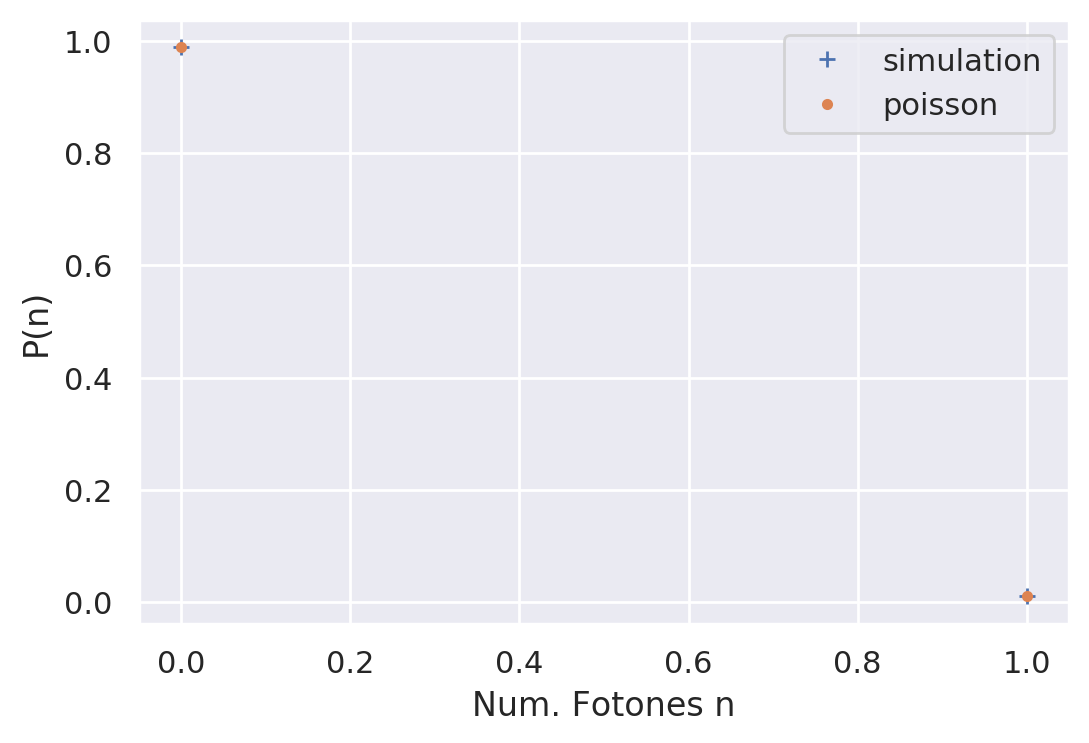

In [126]:
x=plot_pmf(freq,label='simulation')
plt.plot(x,poisson.pmf(x,mu=freq.mean()),'o',label='poisson',markersize=3)
plt.legend()
# plt.savefig('Pn_0.01.png')

In [73]:
T=1e-5
freq=gen_photon_count(N,T)
# plt.savefig('Conteo_T10e-5.png')

In [74]:
print(freq.mean()) #Promedio de 0.1 foton por tiempo de conteo
print(freq.std()) # Desv. estandar 

0.1000010000100001
0.3180580318245651


# Boostrap

In [12]:
import pandas as pd

In [116]:
class bootsrap(object):
    def __init__(self):
        return None
        
    def mean_boostrap(self,data,n):
        means=[data.mean()]
        s=data.shape[0]
        for i in range(1,n):
            data=np.random.choice(data,size=s)
            means.append(data.mean())

        return means

    def fano_boostrap(self,data,n):

        def fanofactor(datos):
            return datos.std()/np.sqrt(datos.mean())

        fanos=[fanofactor(data)]
        for i in range(1,n):
            s=data.shape[0]
            newdata=np.random.choice(data,size=s)
            fanos.append(fanofactor(newdata))

        return fanos

In [118]:
def ci_fano(data):
    boot=bootsrap()
    fan=boot.fano_boostrap(freq,2000)
    return np.quantile(fan,[.025,.975])

In [117]:
boot=bootsrap()

In [56]:
f=boot.fano_boostrap(freq,2000)

In [111]:
m=boot.mean_boostrap(freq,2000)

In [114]:
np.quantile(f,[.025,.975])

array([0.995, 1.004])

In [26]:
np.quantile(m,[.025,0.975])

array([0.108, 0.159])

In [180]:
ci(freq)

(0.09804647715232573, 0.10195552286767448)

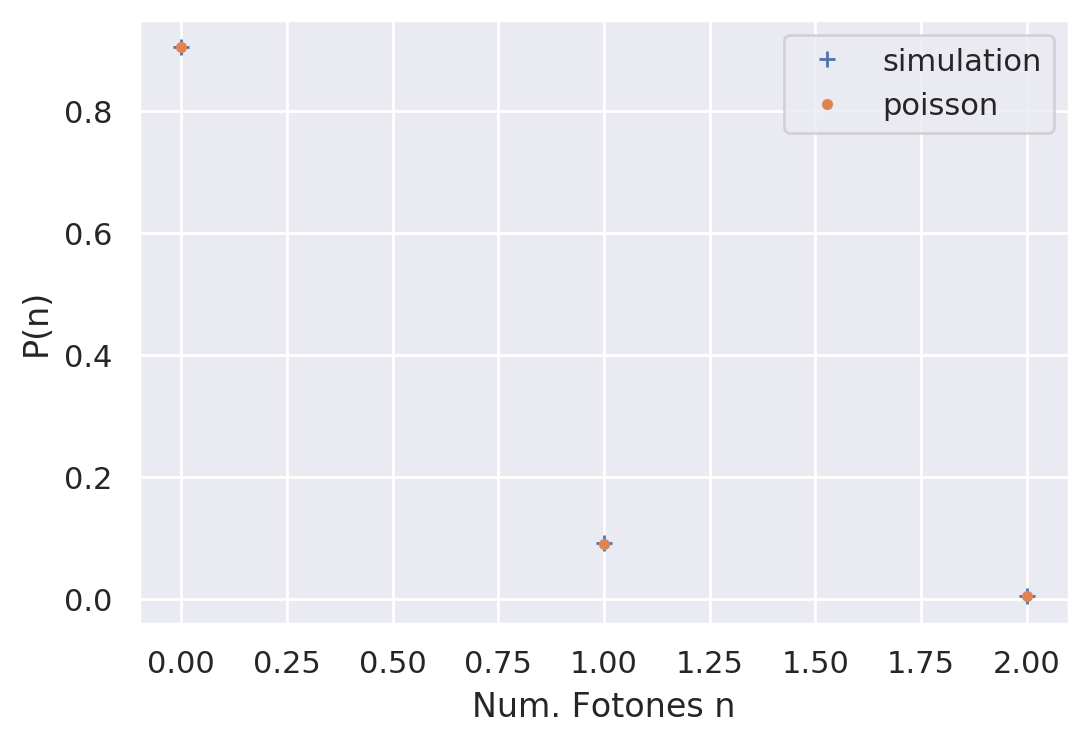

In [132]:
x=plot_pmf(freq,label='simulation')
plt.plot(x,poisson.pmf(x,mu=freq.mean()),'o',label='poisson',markersize=3)
plt.legend()
# plt.savefig('Pn_0.1.png')

In [79]:
T=1e-4
freq=gen_photon_count(N,T)
# plt.savefig('Conteo_T10e-4.png')

In [80]:
print(freq.mean()) #Promedio de 1 foton por tiempo de conteo
print(freq.std()) #Desv. estand 

1.0
0.9896464014990405


In [183]:
ci(freq)

(0.980466753674824, 1.019533246325176)

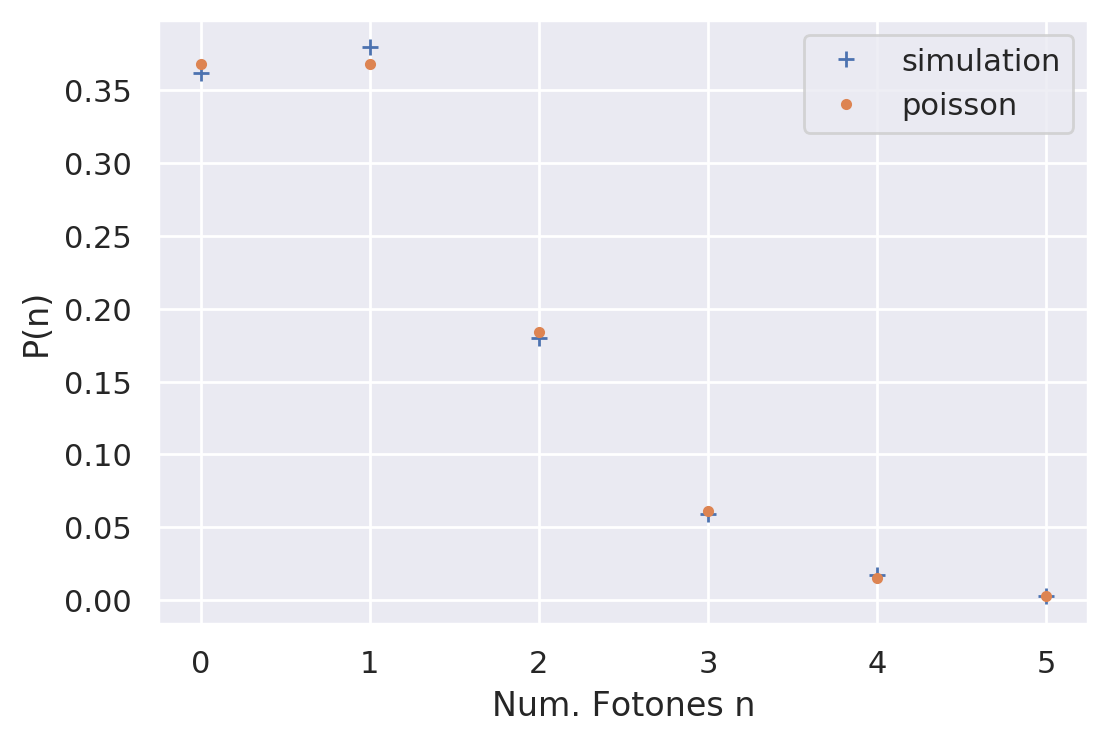

In [135]:
x=plot_pmf(freq,label='simulation')
plt.plot(x,poisson.pmf(x,mu=freq.mean()),'o',label='poisson',markersize=3)
plt.legend()
# plt.savefig('Pn_1.png')

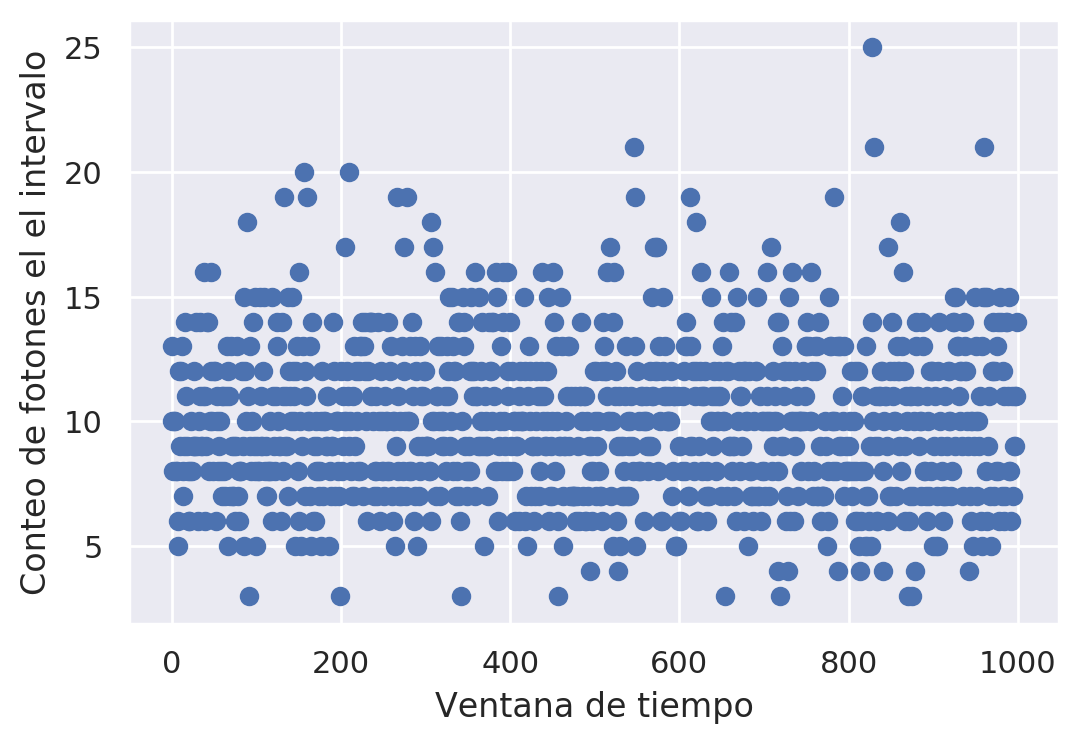

In [13]:
T=1e-3
freq=gen_photon_count(N,T)
# plt.savefig('Conteo_T10e-3.png')

In [185]:
print(freq.mean()) #Promedio de 10 foton por tiempo de conteo
print(freq.std()) # Desv. estandar

10.0
3.023243291566195


In [186]:
ci(freq)

(9.812617439445395, 10.187382560554605)

In [138]:
np.sqrt(freq.mean())

3.1622776601683795

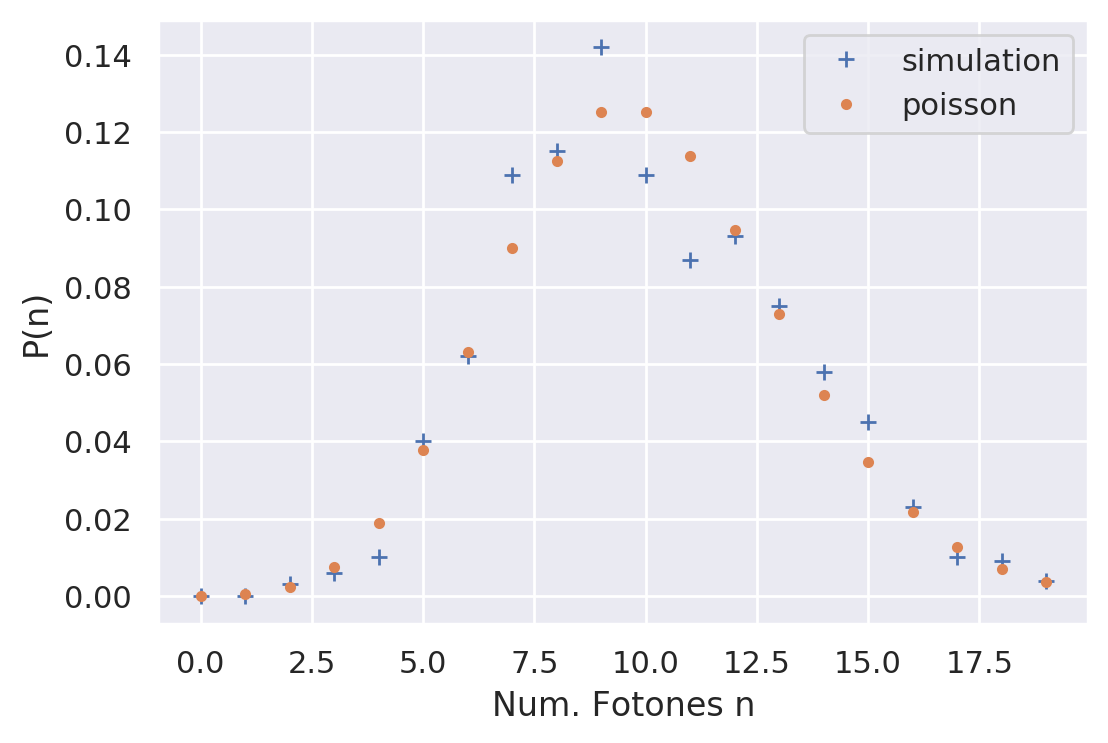

In [139]:
x=plot_pmf(freq,label='simulation')
plt.plot(x,poisson.pmf(x,mu=freq.mean()),'o',label='poisson',markersize=3)
plt.legend()
# plt.savefig('Pn_10.png')

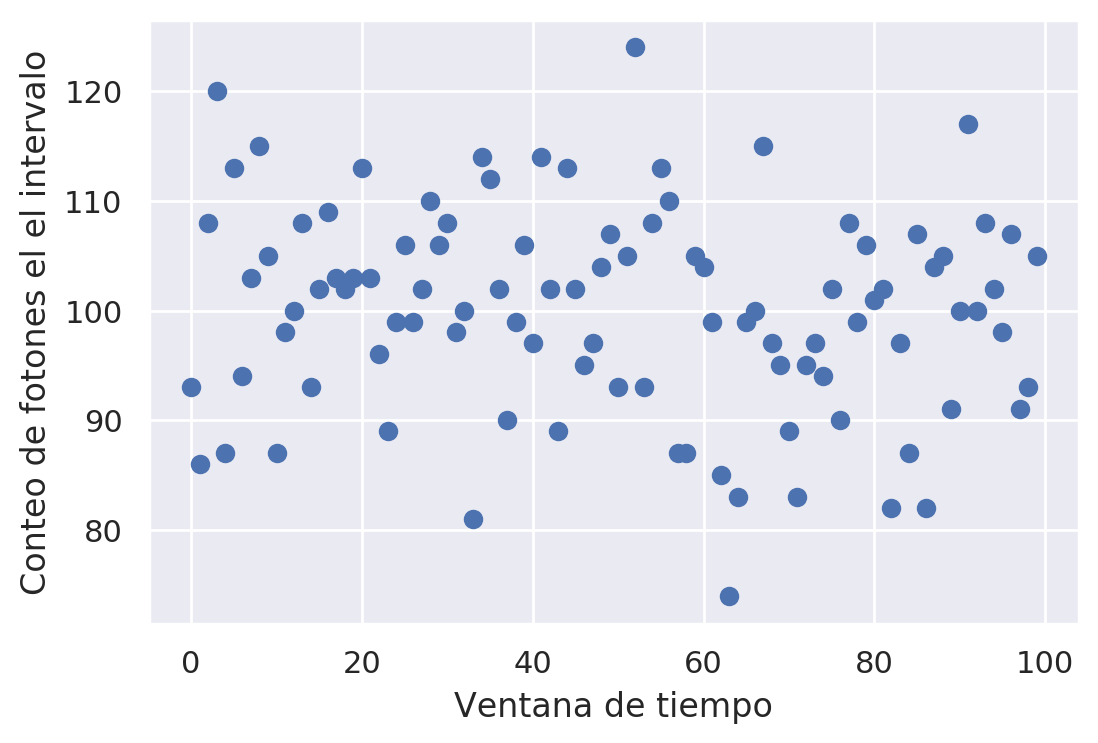

In [14]:
T=1e-2
freq=gen_photon_count(N,T)
# plt.savefig('Conteo_T10e-2.png')

In [188]:
print(freq.mean()) #Promedio de 0.01 foton por tiempo de conteo
print(freq.std()) # Desv. estandar de 0.09

100.0
9.100549433962765


In [189]:
ci(freq)

(98.2162923109433, 101.7837076890567)

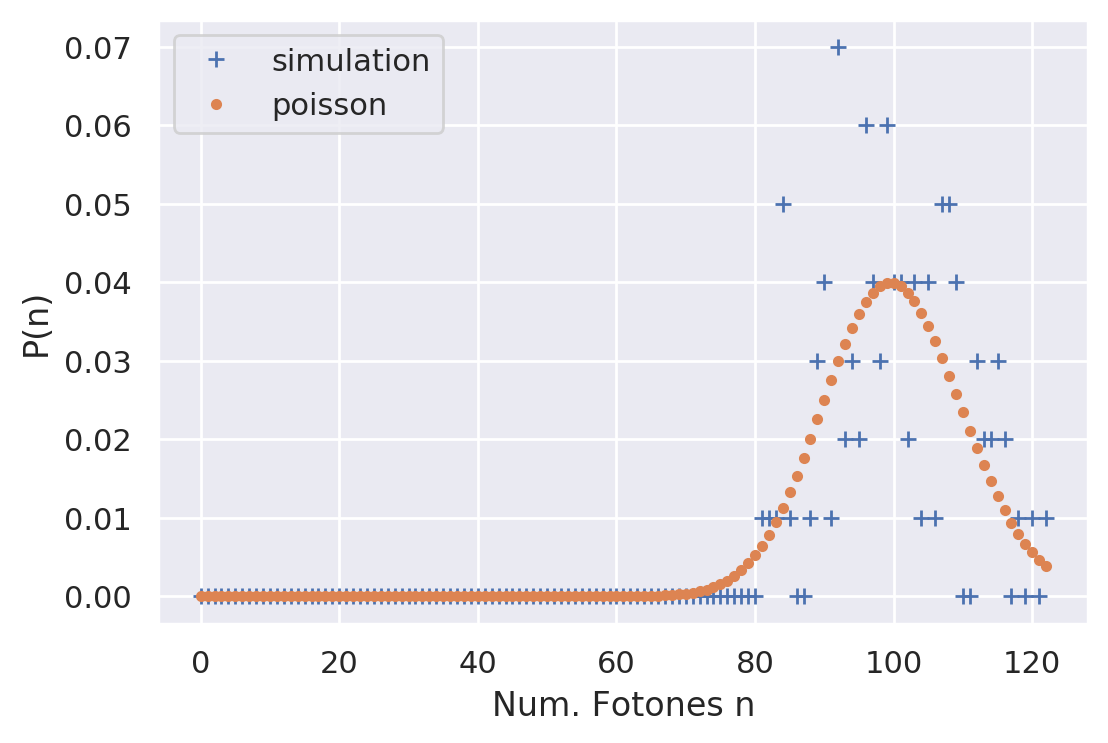

In [142]:
x=plot_pmf(freq,label='simulation')
plt.plot(x,poisson.pmf(x,mu=freq.mean()),'o',label='poisson',markersize=3)
plt.legend()
# plt.savefig('Pn_100.png')

### Me parece que el programa con base en el de fortran de la clase, también funciona, pero es un poco menos facil de escalar y no considera el caso en el que más de un fotón se encuentre en la ventana temporal, que también es posible.  

In [4]:
p=N*T
s=np.zeros(int(1/T))
for i in range(0,int(1/T)):
    r=np.random.rand()
    if r<p:
        s[i] = 1
    else: 
        s[i] = 0

In [68]:
p # promedio de fotones

0.01

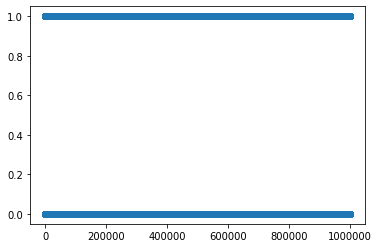

In [22]:
plt.plot(s,'o')